In [31]:
from pylab import *

In [30]:
# the find operation is performed to find a representative member of that equivalence class with which the current cell will be labeled.
# On the other hand, if the current cell has no neighbors, it is assigned a new, previously unused, label.
def find(x):
  y = x
  while labels[y] != y:
    y = labels[y]
  while labels[x] != x:
    z = labels[x]
    labels[x] = y
    x = z
  return y

In [18]:
# the union operation is performed, to specify that these neighboring cells are in fact members of the same equivalence clas

def union(x,y):
  labels[find(x)]= find(y)


In [50]:
import numpy as np
p =  0.2 # Probaility of occupancy
L = 8   # Lattice Size 
largest_label = 0

label = np.random.randint(2, size=(L,L))
label = label < p    # Generate a matrix with proability of occupancy P 
label = label.astype(int)# Convert True and False Matrix to 0 and 1 where 0 means empty and 1 means occupied cell
print(label)

#In this matrix, 1's represent occupied cells; 0's are unoccupied cells.

[[0 0 0 1 0 0 0 0]
 [0 1 0 0 1 1 1 1]
 [0 0 1 0 0 1 0 1]
 [0 1 0 1 0 0 0 1]
 [0 1 1 1 0 0 1 0]
 [1 1 1 1 0 1 1 0]
 [0 1 1 1 0 1 0 1]
 [0 1 0 0 1 0 1 1]]


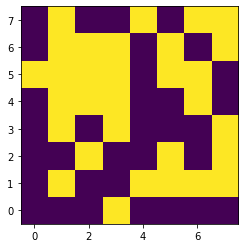

In [51]:
imshow(label, origin='lower')
show()

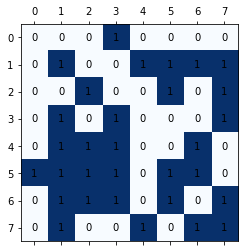

In [52]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
min_val, max_val = 0, L
ax.matshow(label, cmap=plt.cm.Blues)

for i in range(L):
    for j in range(L):
        c = label[j,i]
        ax.text(i, j, str(c), va='center', ha='center')


In [53]:
labels = np.arange(0,L*L)
print(labels)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]


In [54]:

# Raster Scan and Labeling on the Grid

for x in range(L):
  for y in range(L):
    if label[x][y] == 1:
      left = label[x-1][y]
      above =label[x][y-1]
      if (left== 0) and (above == 0):      # Neither a label above nor to the left.
        largest_label = largest_label + 1  # Make a new, as-yet-unused cluster label.
        label[x][y] = largest_label 
      elif (left != 0) and (above == 0):   # One neighbor, to the left
        label[x][y] = find(left)
      elif (left == 0) and (above != 0):   # One neighbor, above.
        label[x][y] = find(above)          # 
      else:                                #  Neighbors BOTH to the left and above.
        union(left,above)                  # Link the left and above clusters.
        label[x][y] = find(left)




In [55]:
print(label)

[[ 0  0  0  1  0  0  0  0]
 [ 0  2  0  0  3  3  3  3]
 [ 0  0  4  0  0  3  0  3]
 [ 0  5  0  6  0  0  0  3]
 [ 0  5  5  5  0  0  7  0]
 [ 8  8  8  8  0  9  9  0]
 [ 0  8  8  8  0  9  0 10]
 [ 0  8  0  0 11  0 12 12]]


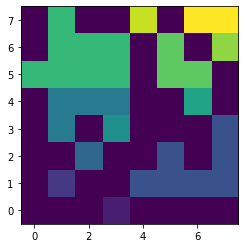

In [56]:
imshow(label, origin='lower')
show()

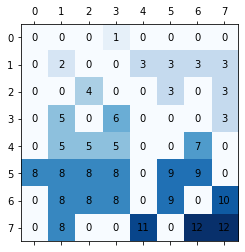

In [57]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
min_val, max_val = 0, L
ax.matshow(label, cmap=plt.cm.Blues)


for i in range(L):
    for j in range(L):
        c = label[j,i]
        ax.text(i, j, str(c), va='center', ha='center')
# This is the result of applying the Hoshen-Kopelman algorithm to the grid on the left. Contiguous clusters are labeled.

References :
  

1.  https://stackoverflow.com/questions/40887
2.  https://en.wikipedia.org/wiki/Hoshen%E2%80%93Kopelman_algorit

display-matrix-values-and-colormap')